In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_dataset(size:tuple):
    X = np.random.uniform(size=size)
    y = np.array(X[:,0] > X[:,1], dtype=int) * 2 - 1
    return X, y

In [3]:
X, y = gen_dataset((1000, 2))
X, y

(array([[0.24888799, 0.28413273],
        [0.85060539, 0.01138435],
        [0.90219797, 0.72452094],
        ...,
        [0.73219982, 0.02290119],
        [0.87267831, 0.56949569],
        [0.92651245, 0.84438446]]),
 array([-1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
        -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
         1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
         1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
         1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
         1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
         1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
         1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
         1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
        -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,
         1,  1, -1,  

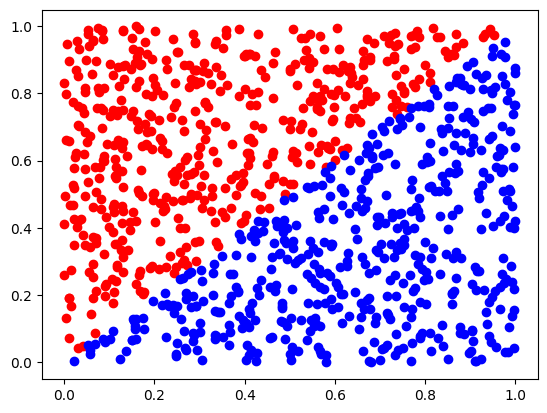

In [4]:
def plot_dataset(X, y):
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')
    plt.show()

plot_dataset(X, y)

In [5]:
class Perceptron:
    def __init__(self, max_iter:int, alpha=0.1):
        self.max_iter = max_iter
        self.alpha = alpha # taxa de aprendizado
        self.activation = lambda a: (a >= 0)*2 -1 # função de ativação

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1]) # matriz de pesos
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            error = (y - ypred)
            cost = np.sum(error**2)
            if cost == 0:
                break
            self.w += self.alpha * np.dot(error, X)
        return self

    def predict(self, X):
        a = np.dot(X, self.w)
        return self.activation(a)

In [6]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
sum(y == ypred) / len(y)

0.997

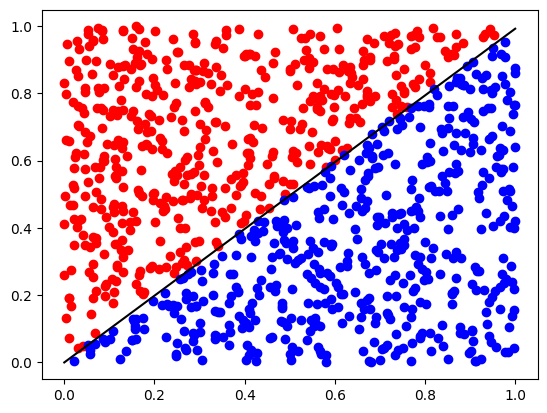

In [7]:
def plot_decision_boundary(X, y, model):
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')

    # Gerar uma grade de pontos ao longo do eixo x
    x_values = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)

    # Calcular os valores correspondentes de y
    y_values = -model.w[0]/model.w[1] * x_values

    # Plotar a linha
    plt.plot(x_values, y_values, color='black')

    plt.show()

plot_decision_boundary(X, y, perceptron)